In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
%matplotlib inline

2021-10-26 10:17:27.754464: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-26 10:17:27.754485: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Understanding Data

In [4]:
source_file = pd.read_csv("../data/train.csv")
source_file.head()

,nomor,jenis kelamin,usia
0,1,0,27
1,2,1,24
2,3,0,29
3,4,1,23
4,5,0,20


In [5]:
training_path = "../data/raw/Training/{}"
observation_folder_path = training_path.format(source_file.loc[68]["nomor"])
filenames = os.listdir(observation_folder_path)
filenames

['69_1.jpg', '69_2.jpg', '69_3.jpg']

we know that in every folder has more than one file (img) now we'll check what image look alike
so we can decide what should we do next

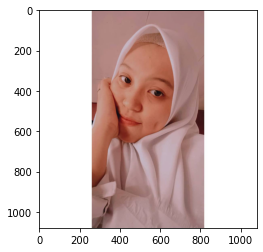

In [2]:
# observation_image_path = observation_folder_path + "/" + filenames[2]
observation_image_path = "../data/Testing/0476a68a-435d-42ee-9074-2dfde14bb281.jpg"
observation_image = load_img(observation_image_path)
plt.imshow(observation_image)

From image above that we see there are a lot of noise that could mess up our model, so we need to clean image first
so our model will be focus with person face we will use openCV to do that

In [3]:
# First we need to detect face from image

from helper.face_detection import detect_faces

# Load image
image = io.imread(observation_image_path)

# Detect faces
detected_faces = detect_faces(image)

# Crop faces and plot
for n, face_rect in enumerate(detected_faces):
    face = Image.fromarray(image).crop(face_rect)
    plt.subplot(1, len(detected_faces), n + 1)
    plt.axis('off')
    plt.imshow(face)

In [8]:
from helper.folder_image_loader import load_image_folder
from helper.image_clustering import image_clustering
from tqdm.notebook import tqdm

clean_file_path = "../data/clean/{}/{}"

folder_target = lambda target: "male" if target == 1 else "female"
for i in tqdm(range(len(source_file))):
    try:
        list_face_image_from_folder = load_image_folder(source_file.loc[i, "nomor"])
        main_face = image_clustering(list_face_image_from_folder)
        if len(main_face) > 0:
            for j, face in enumerate(main_face):
                face.save(
                    clean_file_path.format(folder_target(source_file.loc[i, "jenis kelamin"]),
                                           "{}_{}.jpg".format(i, j)))
    except IndexError:
        pass
    except ValueError:
        pass

  0%|          | 0/770 [00:00<?, ?it/s]

/media/huntz/DATA/project/gender_classification/helper/image_clustering.py:18: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array(list_face_image)[filtered_label]
/media/huntz/DATA/project/gender_classification/helper/image_clustering.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(list_face_image)[filtered_label]
/media/huntz/DATA/proj

Traceback (most recent call last):
  File "/home/huntz/anaconda3/envs/gender_classification/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_6522/2653879241.py", line 10, in <module>
    list_face_image_from_folder = load_image_folder(source_file.loc[i, "nomor"])
  File "/media/huntz/DATA/project/gender_classification/helper/folder_image_loader.py", line 20, in load_image_folder
    faces_detected = [(n, detect_faces(img)) for n, img in enumerate(images)]
  File "/media/huntz/DATA/project/gender_classification/helper/folder_image_loader.py", line 20, in <listcomp>
    faces_detected = [(n, detect_faces(img)) for n, img in enumerate(images)]
  File "/media/huntz/DATA/project/gender_classification/helper/face_detection.py", line 9, in detect_faces
    face_detector = dlib.get_frontal_face_detector()
KeyboardInterrupt

During handling of the above exception, another exception 

TypeError: object of type 'NoneType' has no len()

In [ ]:
len(os.listdir("../data/clean/male")), len(os.listdir("../data/clean/female"))

In [3]:
len(os.listdir("../data/Testing"))

990